<a href="https://colab.research.google.com/github/ruturajkanake/kaggle-contest/blob/master/Kaggle_Titanic_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the required modules

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

Uploading all the files.

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Viewing the data libraries

In [0]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

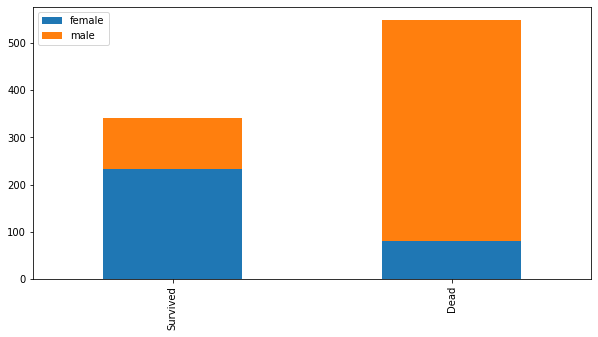

In [0]:
bar_chart('Sex')

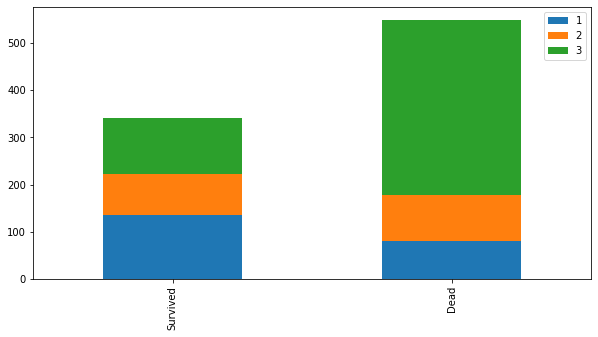

In [0]:
bar_chart('Pclass')

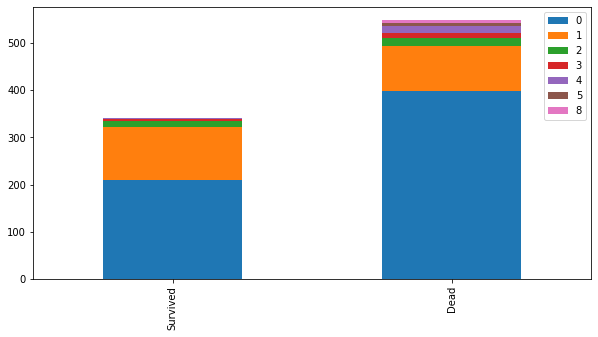

In [0]:
bar_chart('SibSp')

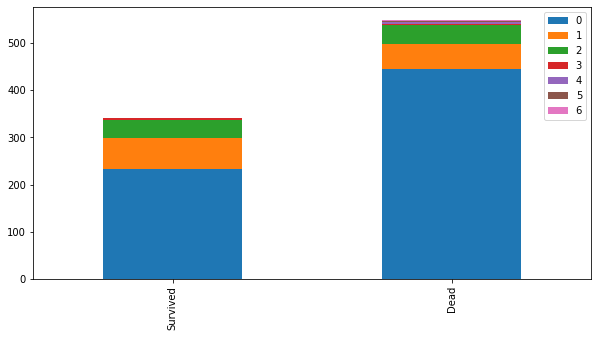

In [0]:
bar_chart('Parch')

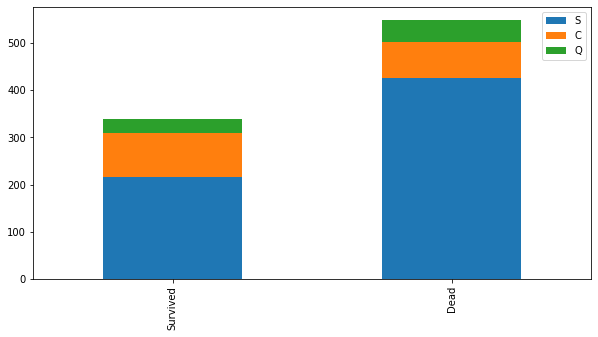

In [0]:
bar_chart('Embarked')

In [0]:
train_test_data = [train, test]
for itr in train_test_data:
  itr['Title'] = itr['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [0]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Mme           1
Sir           1
Ms            1
Countess      1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [0]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

**Title map**

Mr. 0

Miss. 1

Mrs.  2

Master.  3

Other.  4

In [0]:
title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Mlle": 4, "Major": 4, "Lady": 4,
    "Countess": 4, "Sir": 4, "Capt": 4, "Don": 4, "Mme": 4, "Ms": 4, "Jonkheer": 4, "Dona": 4
}
for itr in train_test_data:
  itr['Title'] = itr['Title'].map(title_mapping)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


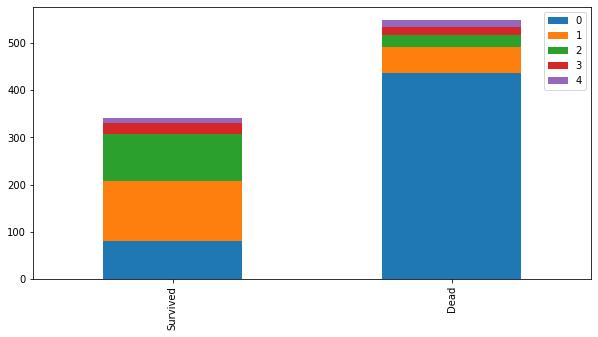

In [0]:
bar_chart('Title')

In [0]:
train.drop('Name', axis=1, inplace = True)

In [0]:
test.drop('Name', axis=1, inplace = True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [0]:
sex_mapping = {
    "male":0, "female":1
}
for itr in train_test_data:
  itr['Sex'] = itr['Sex'].map(sex_mapping)

Filling missing age according to title name

In [0]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


**Age categories**

0. Child  0-16
1. Young  17-25
2. Adult  26-35
3. Mid-age  36-55
4. Early old  56-64
5. Old  >=65

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 25), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 55), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 64), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


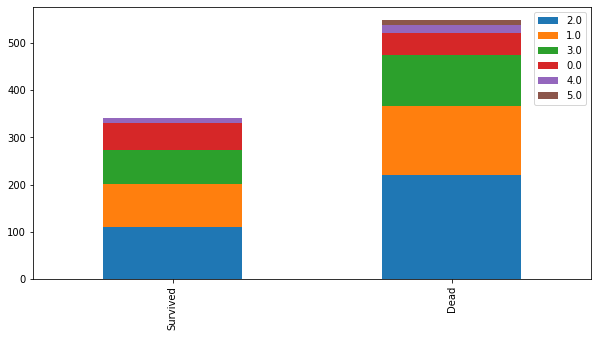

In [0]:
bar_chart('Age')

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [0]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [0]:
embarked_mapping = {
    "S": 0, "C": 1, "Q": 2
}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

Fill missing fares by Pclass

In [0]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


Getting only first character of Cabin 

In [0]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

In [0]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [0]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Fill missing Cabin values

In [0]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
train['FamilySize'] = train['Parch'] + train['SibSp']
test['FamilySize'] = test['Parch'] + test['SibSp']


In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,5.0,0,0,1
1,2,1,1,1,3.0,1,0,PC 17599,2.0,2.0,1,2,1
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,5.0,0,1,0
3,4,1,1,1,2.0,1,0,113803,2.0,2.0,0,2,1
4,5,0,3,0,2.0,0,0,373450,0.0,5.0,0,0,0


In [0]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,5.0,2,0,0
1,893,3,1,3.0,1,0,363272,0.0,5.0,0,2,1
2,894,2,0,4.0,0,0,240276,0.0,5.0,2,0,0
3,895,3,0,2.0,0,0,315154,0.0,5.0,0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,5.0,0,2,2


In [0]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [0]:
drop_features = ['Ticket', 'SibSp', 'Parch' ]
train = train.drop(drop_features, axis = 1)
test = test.drop(drop_features, axis = 1)
target = train['Survived']
train = train.drop('Survived', axis = 1)

In [0]:
train_data = train.drop(['PassengerId'], axis = 1)

In [0]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,5.0,0,0,1
1,1,1,3.0,2.0,2.0,1,2,1
2,3,1,2.0,0.0,5.0,0,1,0
3,1,1,2.0,2.0,2.0,0,2,1
4,3,0,2.0,0.0,5.0,0,0,0
5,3,0,2.0,0.0,5.0,2,0,0
6,1,0,3.0,2.0,4.0,0,0,0
7,3,0,0.0,1.0,5.0,0,3,4
8,3,1,2.0,0.0,5.0,0,2,2
9,2,1,0.0,2.0,4.5,1,2,1


In [0]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,5.0,2,0,0
1,893,3,1,3.0,0.0,5.0,0,2,1
2,894,2,0,4.0,0.0,5.0,2,0,0
3,895,3,0,2.0,0.0,5.0,0,0,0
4,896,3,1,1.0,0.0,5.0,0,2,2
5,897,3,0,0.0,0.0,5.0,0,0,0
6,898,3,1,2.0,0.0,5.0,2,1,0
7,899,2,0,2.0,1.0,5.0,0,0,2
8,900,3,1,1.0,0.0,5.0,1,2,0
9,901,3,0,1.0,1.0,5.0,0,0,2


**Choosing Model**

Importing Libraries

In [0]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [0]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=1, scoring=scoring)


In [0]:
clf.fit(train_data, target)

PassengerId = test.PassengerId

test_data = test.drop("PassengerId", axis=1)

In [0]:
prediction = clf.predict(test_data)


submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
    })

submission.to_csv('submission.csv', index=False, header=1)


print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
